## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

In [2]:
path = Path('/nfs/turbo/umms-awaljee/wsliu/Data/UM_EMR/')
model_path = path/'models/'
model_path.mkdir(exist_ok=True)

In [18]:
[x for x in path.iterdir() if x.is_file()]

[PosixPath('/nfs/turbo/umms-awaljee/wsliu/Data/UM_EMR/readmission_cohort_2014_2019.sas7bdat'),
 PosixPath('/nfs/turbo/umms-awaljee/wsliu/Data/UM_EMR/randomgroups10.sas7bdat'),
 PosixPath('/nfs/turbo/umms-awaljee/wsliu/Data/UM_EMR/esr_cohort_first_draft.sas7bdat'),
 PosixPath('/nfs/turbo/umms-awaljee/wsliu/Data/UM_EMR/randomgroups5.sas7bdat')]

In [3]:
data_df = pd.read_sas(path/'readmission_cohort_2014_2019.sas7bdat')

In [4]:
data_df.shape

(12588, 290)

In [5]:
data_df.index_case.value_counts()

1.0    12588
Name: index_case, dtype: int64

In [4]:
clean_df = data_df[['PatID', 'Weekend_Discharge', 'readmit_case', 'Age_at_AD_DX', 'Age_at_Admit', 'Length_of_Stay', 
                    'BMI', 'Gender', 'MaritalStatus', 'Race', 'Ethnicity', 'discharge_to_hh_w_services', 'discharge_to_home', 
                    'discharge_to_hospice', 'discharge_to_nursing_home', 'discharge_to_other', 'discharge_to_psych_hosp', 
                    'discharge_to_short_term_hosp', 'discharge_to_subacute_nurs_rehab', 'Outpatient', 'Scheduled', 'Urgent', 
                    'Emergent', 'index_px_ctsx', 'index_px_ent', 'index_px_mia', 'index_px_neuro', 'index_px_ortho', 
                    'index_px_pv', 'index_dx_dvt_pe', 'index_dx_gi_bleed', 'index_dx_hem', 'index_dx_mi', 'index_dx_pf', 
                    'index_dx_pna', 'index_dx_rf', 'index_dx_ssi', 'prev_12mo_ip_ct', 'prev_6mo_ip_ct', 'prev_3mo_ip_ct', 
                    'prev_1mo_ip_ct', 'prev_12mo_ed_urg_ct', 'prev_6mo_ed_urg_ct', 'prev_3mo_ed_urg_ct', 'prev_1mo_ed_urg_ct', 
                    'prev_12mo_visit_ct', 'prev_6mo_visit_ct', 'prev_3mo_visit_ct', 'prev_1mo_visit_ct', 'unique_medication_ct', 
                    'tobacco_user', 'alcohol_user', 'drug_user', 'Payor_Private', 'Payor_Medicaid', 'Payor_Medicare', 
                    'Payor_Governmental', 'Payor_Self', 'Payor_Workers_Comp', 'Payor_Other_Unknown', 'OperationDate_ct', 
                    'Has_OperationDate', 'SurgicalProcedure_ct', 'Has_SurgicalProcedureStartDate', 'admit_from_op_px_adp_clinic', 
                    'admit_from_ed', 'admit_from_home', 'admit_from_missing', 'admit_from_other', 'admit_from_snf', 
                    'prev_yr_hosp_charge_sum', 'prev_yr_nonhosp_charge_sum', 'invasive_bp', 'hcc_1', 'hcc_2', 'hcc_6', 'hcc_8', 
                    'hcc_9', 'hcc_10', 'hcc_11', 'hcc_12', 'hcc_17', 'hcc_18', 'hcc_19', 'hcc_20', 'hcc_21', 'hcc_22', 'hcc_23', 
                    'hcc_27', 'hcc_28', 'hcc_29', 'hcc_32', 'hcc_33', 'hcc_34', 'hcc_35', 'hcc_39', 'hcc_40', 'hcc_41', 'hcc_42',
                    'hcc_45', 'hcc_46', 'hcc_47', 'hcc_48', 'hcc_54', 'hcc_55', 'hcc_56', 'hcc_57', 'hcc_58', 'hcc_59', 'hcc_60', 
                    'hcc_61', 'hcc_62', 'hcc_63', 'hcc_65', 'hcc_66', 'hcc_67', 'hcc_68', 'hcc_70', 'hcc_71', 'hcc_72', 'hcc_73', 
                    'hcc_74', 'hcc_75', 'hcc_76', 'hcc_77', 'hcc_78', 'hcc_79', 'hcc_80', 'hcc_81', 'hcc_82', 'hcc_83', 'hcc_84', 
                    'hcc_85', 'hcc_86', 'hcc_87', 'hcc_88', 'hcc_89', 'hcc_96', 'hcc_97', 'hcc_98', 'hcc_99', 'hcc_100', 
                    'hcc_103', 'hcc_104', 'hcc_106', 'hcc_107', 'hcc_108', 'hcc_110', 'hcc_111', 'hcc_112', 'hcc_113', 'hcc_114',
                    'hcc_115', 'hcc_120', 'hcc_122', 'hcc_124', 'hcc_133', 'hcc_134', 'hcc_135', 'hcc_136', 'hcc_137', 'hcc_138', 
                    'hcc_139', 'hcc_140', 'hcc_141', 'hcc_145', 'hcc_146', 'hcc_147', 'hcc_148', 'hcc_156', 'hcc_157', 'hcc_158',
                    'hcc_159', 'hcc_160', 'hcc_161', 'hcc_162', 'hcc_164', 'hcc_166', 'hcc_167', 'hcc_168', 'hcc_169', 'hcc_170', 
                    'hcc_173', 'hcc_176', 'hcc_186', 'hcc_187', 'hcc_188', 'hcc_189', 'hcc_206', 'hcc_226', 'hcc_243']]

In [7]:
clean_df.shape

(12588, 191)

In [5]:
clean_df.Race.value_counts(dropna=False)

b'Caucasian'                                     10492
b'African American'                               1632
b'Asian'                                           186
b'Other'                                           167
b'Unknown'                                          42
b'American Indian or Alaska Native'                 36
b'Patient Refused'                                  14
b'Native Hawaiian and Other Pacific Islander'       10
NaN                                                  9
Name: Race, dtype: int64

In [6]:
clean_df.admit_from_missing.value_counts(dropna=False)

NaN     6918
 0.0    5670
Name: admit_from_missing, dtype: int64

In [7]:
clean_df.admit_from_home.value_counts(dropna=False)

NaN     6918
 0.0    5518
 1.0     152
Name: admit_from_home, dtype: int64

### Missing value imputation
1. for continuous variables, fill missing with cohort mean.
1. for categorical variables, fill missing with an extra level "missing". 
1. binary variables with no missing can be treated as continuous; binary variables with missing are treated as categorical. 

In [8]:
categorical = list(clean_df.dtypes.loc[clean_df.dtypes=='object'].index)
binary_with_missing = ['discharge_to_hh_w_services', 'discharge_to_home', 'discharge_to_hospice', 'discharge_to_nursing_home', 
                       'discharge_to_other', 'discharge_to_psych_hosp', 'discharge_to_short_term_hosp', 
                       'discharge_to_subacute_nurs_rehab', 'admit_from_op_px_adp_clinic', 'admit_from_ed', 'admit_from_home', 
                       'admit_from_missing', 'admit_from_other', 'admit_from_snf']
continous = [c for c in clean_df.columns if c not in categorical and c not in binary_with_missing]
continous.remove('readmit_case')
categorical.remove('PatID')

In [9]:
len(categorical), len(binary_with_missing), len(continous)

(4, 14, 171)

In [10]:
cnt_df = clean_df[continous].fillna(clean_df[continous].mean())
bnr_df = pd.get_dummies(clean_df[binary_with_missing].fillna('missing'))
ctg_df = pd.get_dummies(clean_df[categorical].fillna('missing'))

In [11]:
cnt_df.shape, bnr_df.shape, ctg_df.shape

((12588, 171), (12588, 41), (12588, 19))

In [12]:
all_df = pd.concat([clean_df[['PatID', 'readmit_case']], cnt_df, bnr_df, ctg_df], axis=1)

In [13]:
all_df.shape

(12588, 233)

### Training/Testing Splitting

In [14]:
group5 = pd.read_sas(path/'randomgroups5.sas7bdat')

In [14]:
group10 = pd.read_sas(path/'randomgroups10.sas7bdat')

In [295]:
tst_id = 7.
val_id = 2.

In [296]:
#tst_set = set(group5.loc[group5.GroupID==tst_id, 'PatID'])
#val_set = set(group5.loc[group5.GroupID==val_id, 'PatID'])

tst_set = set(group10.loc[group10.GroupID==tst_id, 'PatID'])
val_set = set(group10.loc[group10.GroupID==val_id, 'PatID'])

tst_df = all_df.loc[all_df.PatID.isin(tst_set)]
train_df = all_df.loc[~all_df.PatID.isin(tst_set)]
val_df = all_df.loc[all_df.PatID.isin(val_set)]
trn_df = train_df.loc[~train_df.PatID.isin(val_set)]

X_trn = trn_df.drop(['PatID', 'readmit_case'], axis=1).values
Y_trn = pd.get_dummies(trn_df['readmit_case']).values

X_train = train_df.drop(['PatID', 'readmit_case'], axis=1).values
Y_train = pd.get_dummies(train_df['readmit_case']).values

X_val = val_df.drop(['PatID', 'readmit_case'], axis=1).values
Y_val = pd.get_dummies(val_df['readmit_case']).values

X_tst = tst_df.drop(['PatID', 'readmit_case'], axis=1).values
Y_tst = pd.get_dummies(tst_df['readmit_case']).values

In [169]:
tst_df.shape, val_df.shape, trn_df.shape

((1218, 233), (1256, 233), (10114, 233))

In [165]:
X_trn.shape, X_val.shape, X_tst.shape

((10050, 231), (1282, 231), (1256, 231))

## Modeling by Neural Networks (NN)

In [22]:
from keras.layers import Input, Reshape, Dense, Activation, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
import keras.backend as K
import sys, os

Using TensorFlow backend.


In [32]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from keras_addon import AUCCheckPoint
from DL_utils import plot_roc

Model definition:

In [249]:
input_X = Input(shape=(X_trn.shape[1],))
x = Dense(2, activation='relu')(input_X)
#x = Dense(8, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=input_X, outputs=prediction)

In [250]:
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy')

In [251]:
checkpoint = AUCCheckPoint((model_path/'temp.h5').as_posix(), validation_x=X_val, validation_y=Y_val)
reducelr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=K.epsilon())
earlystop = EarlyStopping(patience=30)

In [252]:
batch_size = 256

In [253]:
history = model.fit(x=X_trn, y=Y_trn, batch_size=batch_size, epochs=100, verbose=1, callbacks=[checkpoint, reducelr, earlystop], 
                    validation_data=[X_val, Y_val])

Train on 10114 samples, validate on 1218 samples
Epoch 1/100
10114/10114 [==============================] - 1s 52us/step - loss: 2.3105 - val_loss: 1.4517
AUC: 0.5505

Epoch 2/100
10114/10114 [==============================] - 0s 12us/step - loss: 1.7475 - val_loss: 1.0165
AUC: 0.5347

Epoch 3/100
10114/10114 [==============================] - 0s 12us/step - loss: 1.0134 - val_loss: 0.9820
AUC: 0.5238

Epoch 4/100
10114/10114 [==============================] - 0s 12us/step - loss: 0.9340 - val_loss: 0.9676
AUC: 0.5233

Epoch 5/100
10114/10114 [==============================] - 0s 12us/step - loss: 0.8999 - val_loss: 0.9526
AUC: 0.5219

Epoch 6/100
10114/10114 [==============================] - 0s 12us/step - loss: 0.8158 - val_loss: 0.9422
AUC: 0.5217

Epoch 7/100
10114/10114 [==============================] - 0s 12us/step - loss: 0.8317 - val_loss: 0.9363
AUC: 0.5248

Epoch 8/100
10114/10114 [==============================] - 0s 12us/step - loss: 0.8106 - val_loss: 0.9221
AUC: 0.5166


10114/10114 [==============================] - 0s 11us/step - loss: 0.4426 - val_loss: 0.4182
AUC: 0.5000

Epoch 70/100
10114/10114 [==============================] - 0s 11us/step - loss: 0.4426 - val_loss: 0.4182
AUC: 0.5000

Epoch 71/100
10114/10114 [==============================] - 0s 11us/step - loss: 0.4426 - val_loss: 0.4182
AUC: 0.5000

Epoch 72/100
10114/10114 [==============================] - 0s 11us/step - loss: 0.4426 - val_loss: 0.4182
AUC: 0.5000

Epoch 73/100
10114/10114 [==============================] - 0s 11us/step - loss: 0.4426 - val_loss: 0.4182
AUC: 0.5000

Epoch 74/100
10114/10114 [==============================] - 0s 11us/step - loss: 0.4426 - val_loss: 0.4182
AUC: 0.5000

Epoch 75/100
10114/10114 [==============================] - 0s 11us/step - loss: 0.4426 - val_loss: 0.4182
AUC: 0.5000

Epoch 76/100
10114/10114 [==============================] - 0s 11us/step - loss: 0.4426 - val_loss: 0.4182
AUC: 0.5000

Epoch 77/100
10114/10114 [===========================

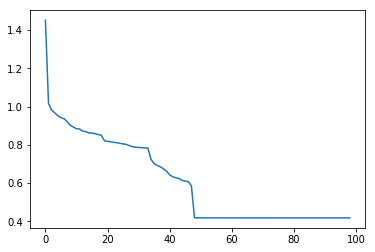

In [254]:
plt.plot(history.history['val_loss'])

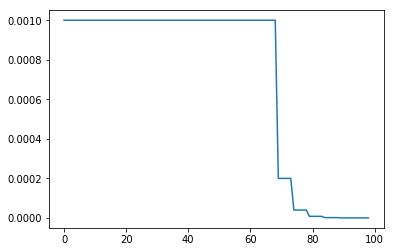

In [255]:
plt.plot(history.history['lr'])

In [256]:
model.load_weights((model_path/'temp.h5').as_posix())

In [257]:
Y_pred = model.predict(X_tst)

{0: 0.5571829888451443}

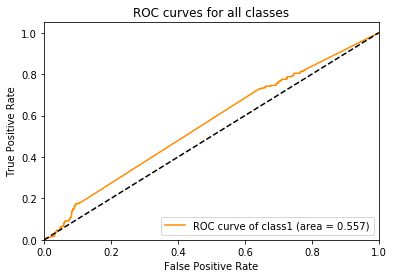

In [258]:
plot_roc(Y_pred[:, 1], Y_tst[:, 1])

## Modeling by XGBoost

In [40]:
from xgboost import XGBClassifier
import time

In [297]:
model_xgb = XGBClassifier(max_depth=2, n_estimators=100)

In [298]:
start = time.time()
xgb = model_xgb.fit(X_train, Y_train[:, 1])
print('It takes {} sec to train.'.format(time.time()-start))

It takes 4.388597011566162 sec to train.


In [299]:
y_pred = xgb.predict_proba(X_tst)

{0: 0.7029568569553806}

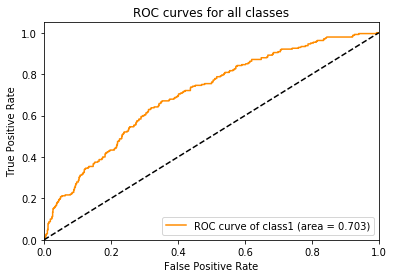

In [300]:
plot_roc(y_pred[:, 1], Y_tst[:, 1])

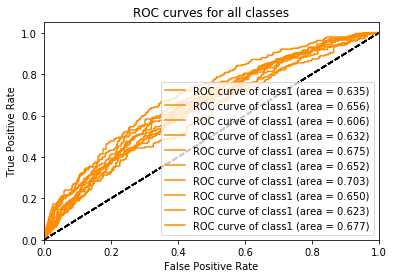

In [287]:
auc_lst = []
for tst_id in range(1, 11):
    tst_set = set(group10.loc[group10.GroupID==tst_id, 'PatID'])
    tst_df = all_df.loc[all_df.PatID.isin(tst_set)]
    train_df = all_df.loc[~all_df.PatID.isin(tst_set)]
    X_train = train_df.drop(['PatID', 'readmit_case'], axis=1).values
    Y_train = pd.get_dummies(train_df['readmit_case']).values
    X_tst = tst_df.drop(['PatID', 'readmit_case'], axis=1).values
    Y_tst = pd.get_dummies(tst_df['readmit_case']).values
    model_xgb = XGBClassifier(max_depth=2, n_estimators=100)
    xgb = model_xgb.fit(X_train, Y_train[:, 1])
    y_pred = xgb.predict_proba(X_tst)
    auc = plot_roc(y_pred[:, 1], Y_tst[:, 1])
    auc_lst.append(auc[0])

In [288]:
np.mean(auc_lst), np.std(auc_lst)/np.sqrt(10)

(0.6507918158496263, 0.008605263490946417)

In [301]:
feature_imp = pd.Series(model_xgb.feature_importances_, index=trn_df.drop(['PatID', 'readmit_case'], axis=1).columns)

In [302]:
feature_imp.sort_values(ascending=False).head(20)

prev_12mo_ip_ct                         0.067245
prev_12mo_ed_urg_ct                     0.059116
prev_6mo_ed_urg_ct                      0.046957
prev_6mo_visit_ct                       0.039741
hcc_135                                 0.039737
discharge_to_hospice_0.0                0.031317
prev_1mo_visit_ct                       0.024772
hcc_59                                  0.024301
discharge_to_psych_hosp_1.0             0.024285
discharge_to_hospice_1.0                0.023712
admit_from_ed_1.0                       0.022915
hcc_27                                  0.020930
hcc_28                                  0.020927
Length_of_Stay                          0.019440
hcc_139                                 0.018489
unique_medication_ct                    0.018477
discharge_to_subacute_nurs_rehab_1.0    0.018236
Age_at_AD_DX                            0.018203
hcc_136                                 0.018173
prev_6mo_ip_ct                          0.017321
dtype: float32

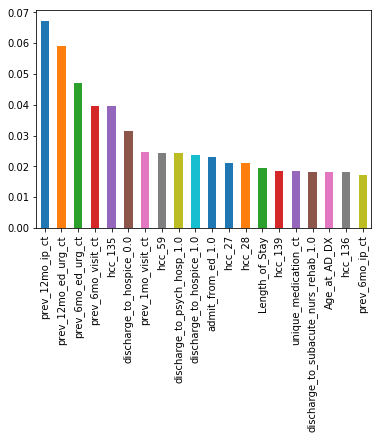

In [303]:
feature_imp.sort_values(ascending=False).head(20).plot.bar()

In [68]:
sum(feature_imp<0.00001)

126

In [56]:
trn_df.drop(['PatID', 'readmit_case'], axis=1).shape

(10017, 231)

In [52]:
features = all_df.columns

In [57]:
feature_imp.shape

(231,)